##Importing Relevant Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
warnings.filterwarnings('ignore')
import math
import textwrap
from seaborn.palettes import color_palette
import geopandas as gpd

##Loading the Data

In [2]:
df = pd.read_csv('alzheimers_prediction_dataset.csv')
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


##Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [4]:
df.describe()

,Age,Education Level,BMI,Cognitive Test Score
count,74283.000000,74283.000000,74283.000000,74283.000000
mean,71.964703,9.487514,26.780639,64.654241
std,12.980748,5.757020,4.764679,20.153247
min,50.000000,0.000000,18.500000,30.000000
25%,61.000000,4.000000,22.700000,47.000000
50%,72.000000,9.000000,26.800000,65.000000
75%,83.000000,14.000000,30.900000,82.000000
max,94.000000,19.000000,35.000000,99.000000


In [5]:
df.rename(columns={"Genetic Risk Factor (APOE-ε4 allele)": "Genetic Risk Factor"}, inplace=True)

In [6]:
df.apply(lambda x: x.unique())

,0
Country,"[Spain, Argentina, South Africa, China, Sweden..."
Age,"[90, 72, 86, 53, 58, 55, 91, 67, 84, 80, 69, 5..."
Gender,"[Male, Female]"
Education Level,"[1, 7, 19, 17, 3, 2, 18, 11, 15, 10, 6, 13, 12..."
BMI,"[33.0, 29.9, 22.9, 31.2, 30.0, 34.0, 24.1, 23...."
Physical Activity Level,"[Medium, High, Low]"
Smoking Status,"[Never, Former, Current]"
Alcohol Consumption,"[Occasionally, Never, Regularly]"
Diabetes,"[No, Yes]"
Hypertension,"[No, Yes]"


In [7]:
df.isna().sum()

,0
Country,0
Age,0
Gender,0
Education Level,0
BMI,0
Physical Activity Level,0
Smoking Status,0
Alcohol Consumption,0
Diabetes,0
Hypertension,0


In [8]:
# Summary Statistics for Categorical variables
categorical_cols = df.select_dtypes(exclude=['number']).columns
df[categorical_cols].describe()

,Country,Gender,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Depression Level,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor,Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
count,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283,...,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283
unique,20,2,3,3,3,2,2,2,2,3,...,3,3,3,3,2,3,3,3,2,2
top,Brazil,Female,High,Current,Never,No,No,Normal,No,Medium,...,Average,High,Unemployed,Single,No,Medium,Low,Medium,Rural,No
freq,3839,37249,24853,24915,24865,59527,52134,51973,52004,24843,...,24917,24906,24801,25169,59561,24859,24873,24886,37203,43570


Checking for Outliers using boxplot

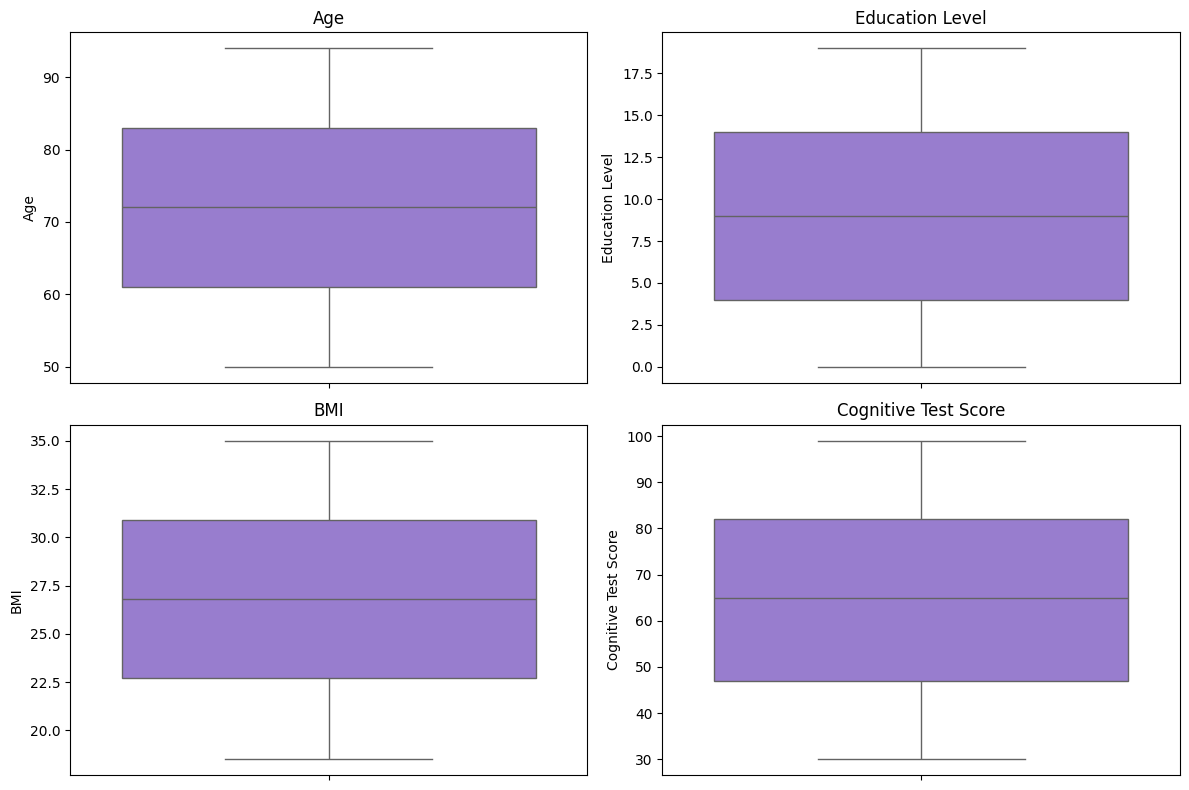

In [9]:
numeric_cols = ['Age', 'Education Level', 'BMI', 'Cognitive Test Score']

plt.figure(figsize=(12, 8))

purple_color = "#9370DB"

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], color=purple_color)
    plt.title(col)

plt.tight_layout()
plt.show()

Exploring distribution and structure of Categorical data

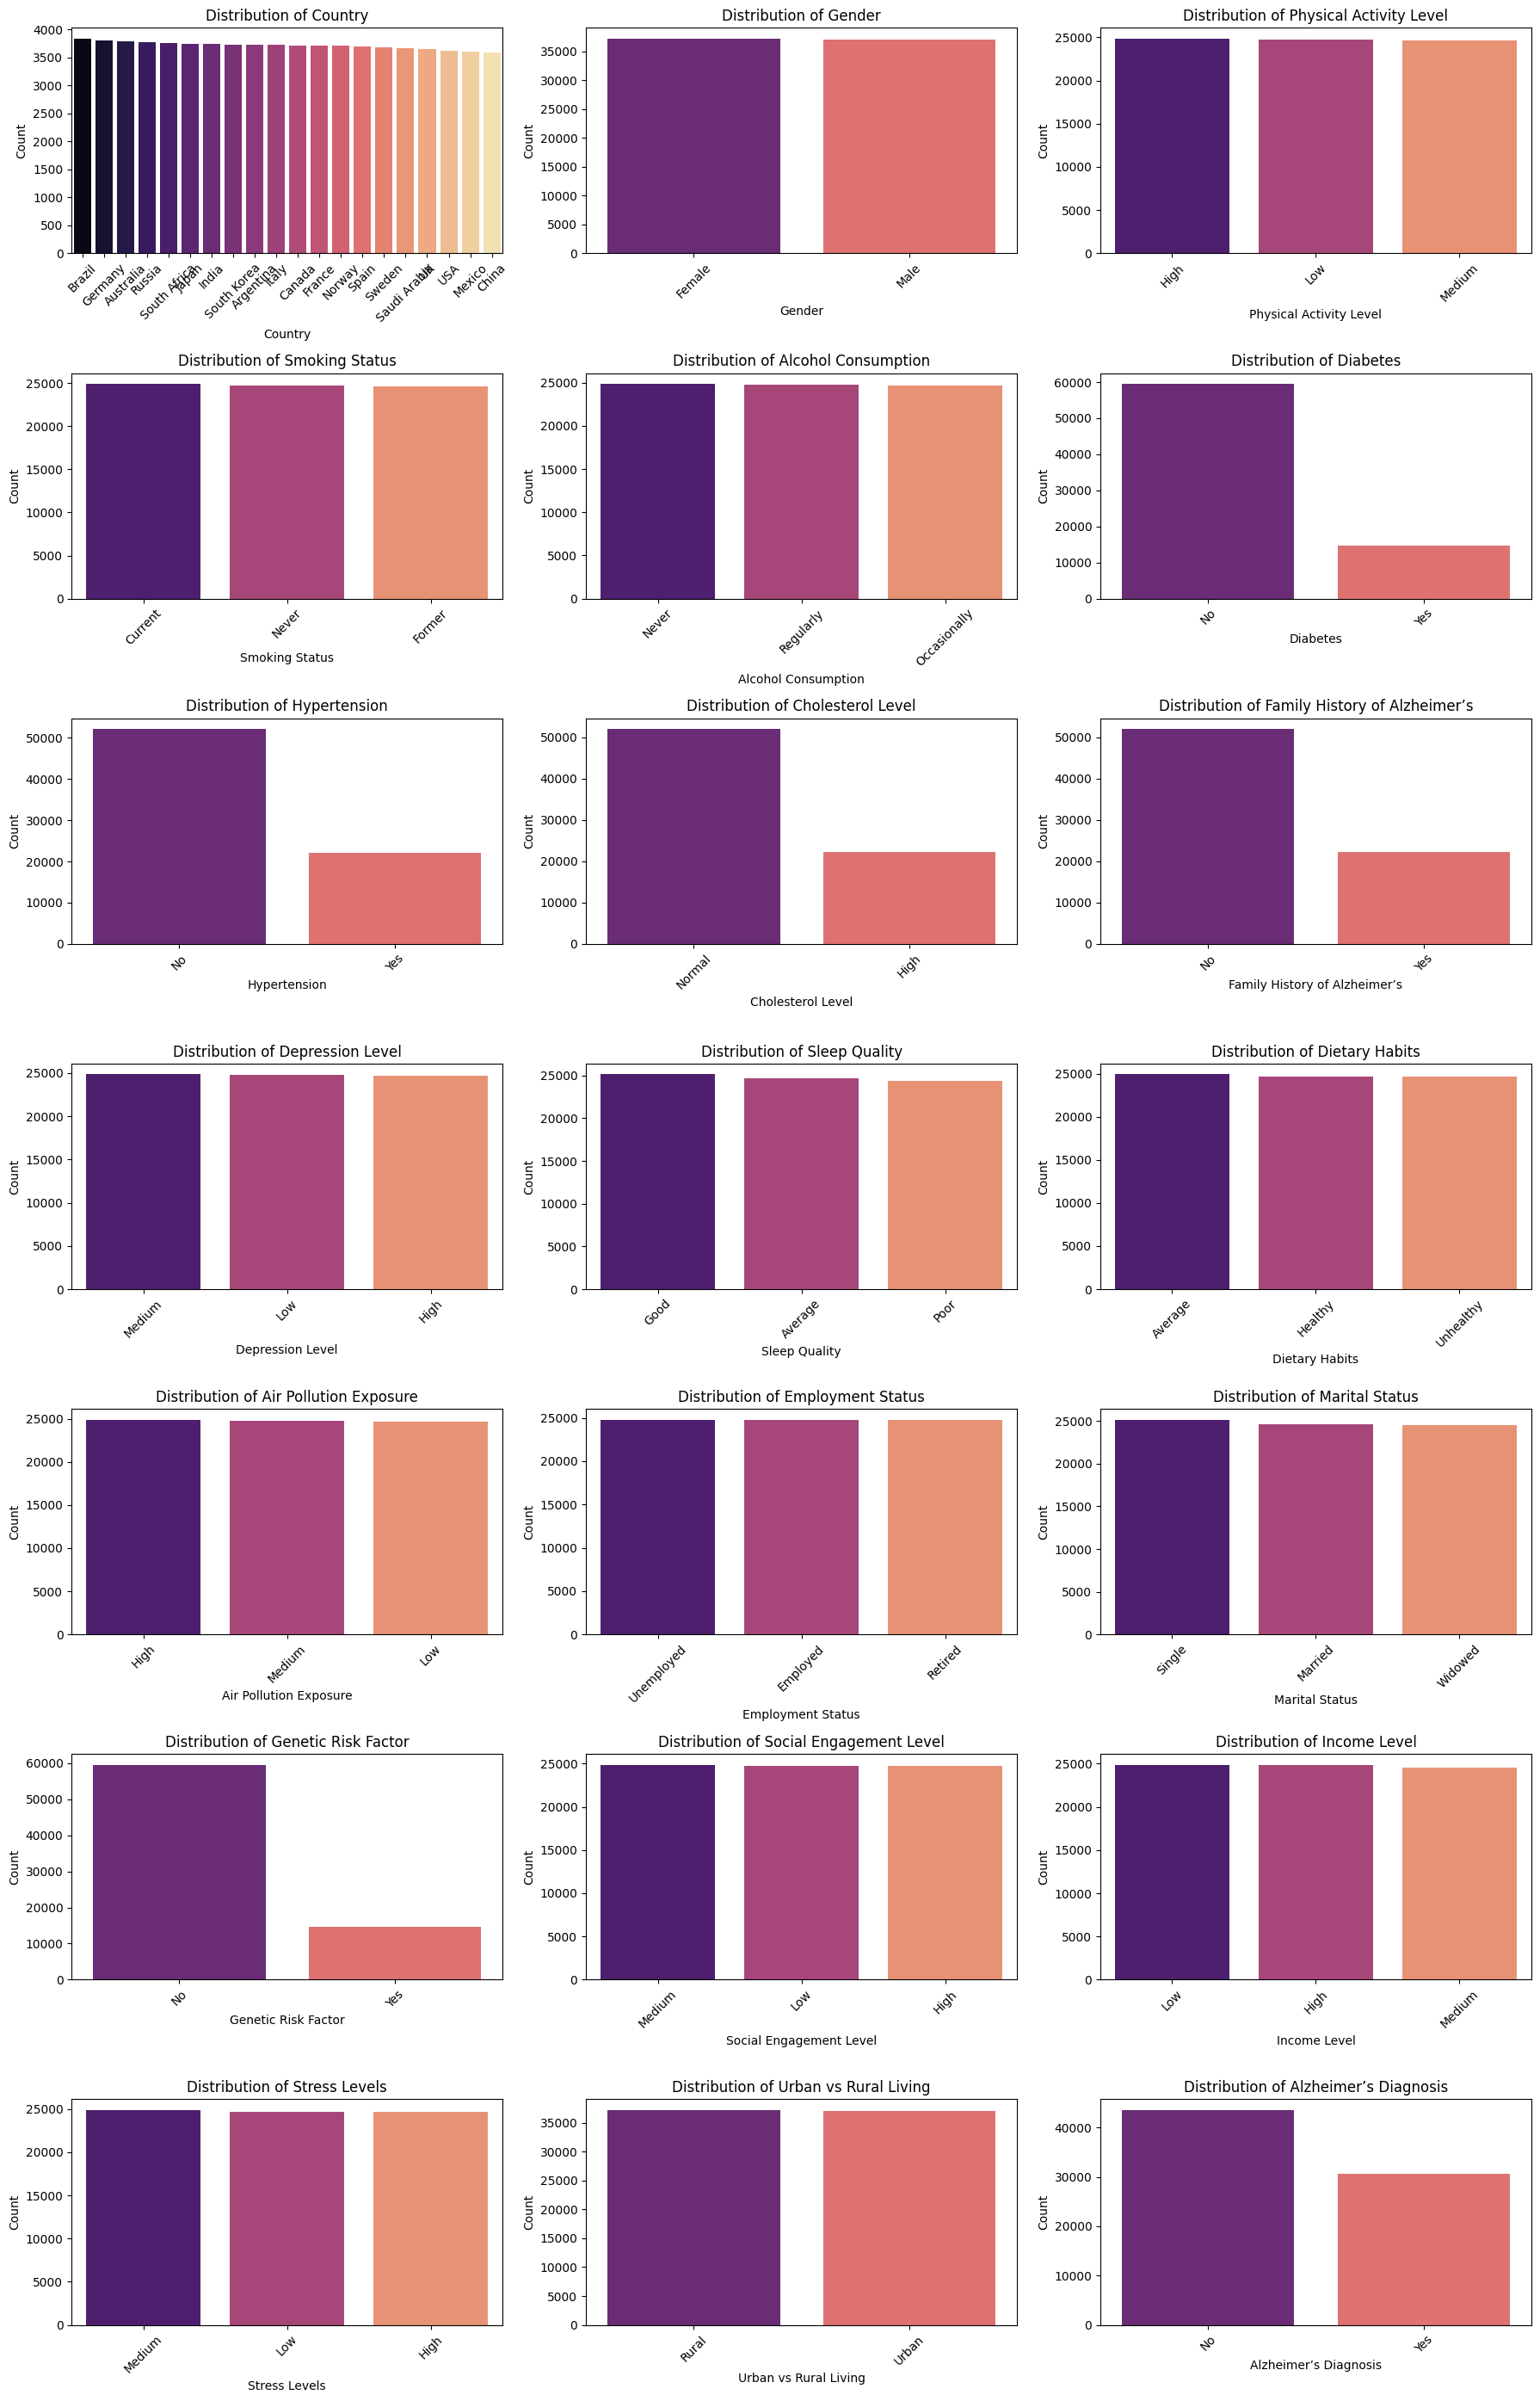

In [10]:
num_plots = len(categorical_cols)
cols = 3
rows = math.ceil(num_plots / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], order=df[col].value_counts().index, ax=axes[i], palette="magma")
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Hiding any not used subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Correlation Analysis of the target variable with numeric features

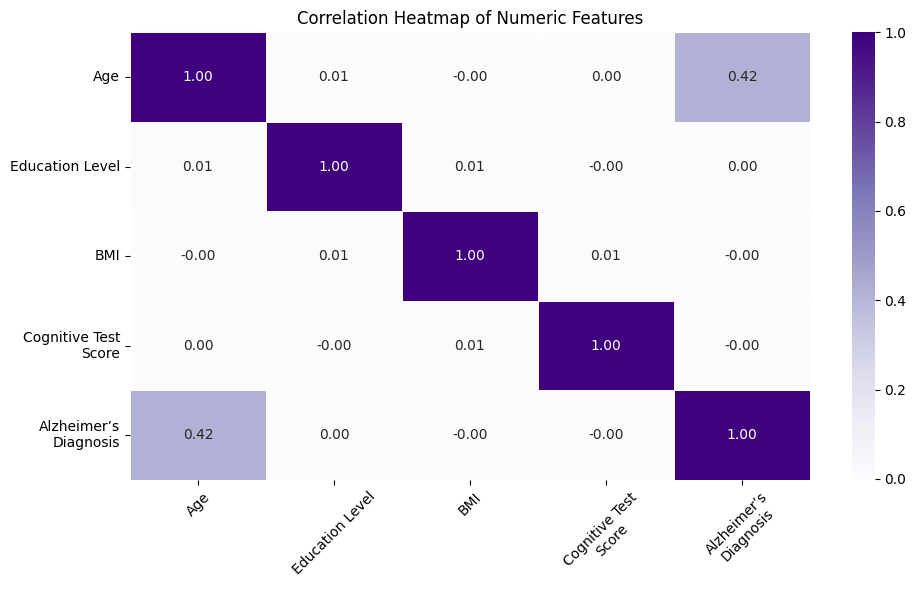

In [11]:
df_corr = df.copy()
df_corr["Alzheimer’s Diagnosis"] = df_corr["Alzheimer’s Diagnosis"].map({"No": 0, "Yes": 1})

numeric_cols_corr = df_corr.select_dtypes(include=["int64", "float64"]).columns
corr_matrix = df_corr[numeric_cols_corr].corr()

wrapped_labels = ['\n'.join(textwrap.wrap(label, width=15)) for label in corr_matrix.columns]

plt.figure(figsize=(10, 6))
ax = sns.heatmap(corr_matrix, annot=True, cmap="Purples", fmt=".2f", linewidths=0.5)

# Center wrapped labels on both axes
ax.set_xticklabels(wrapped_labels, rotation=45, ha='center')
ax.set_yticklabels(wrapped_labels, rotation=0, va='center')

plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

Exploring distribution and structure of Numerical data

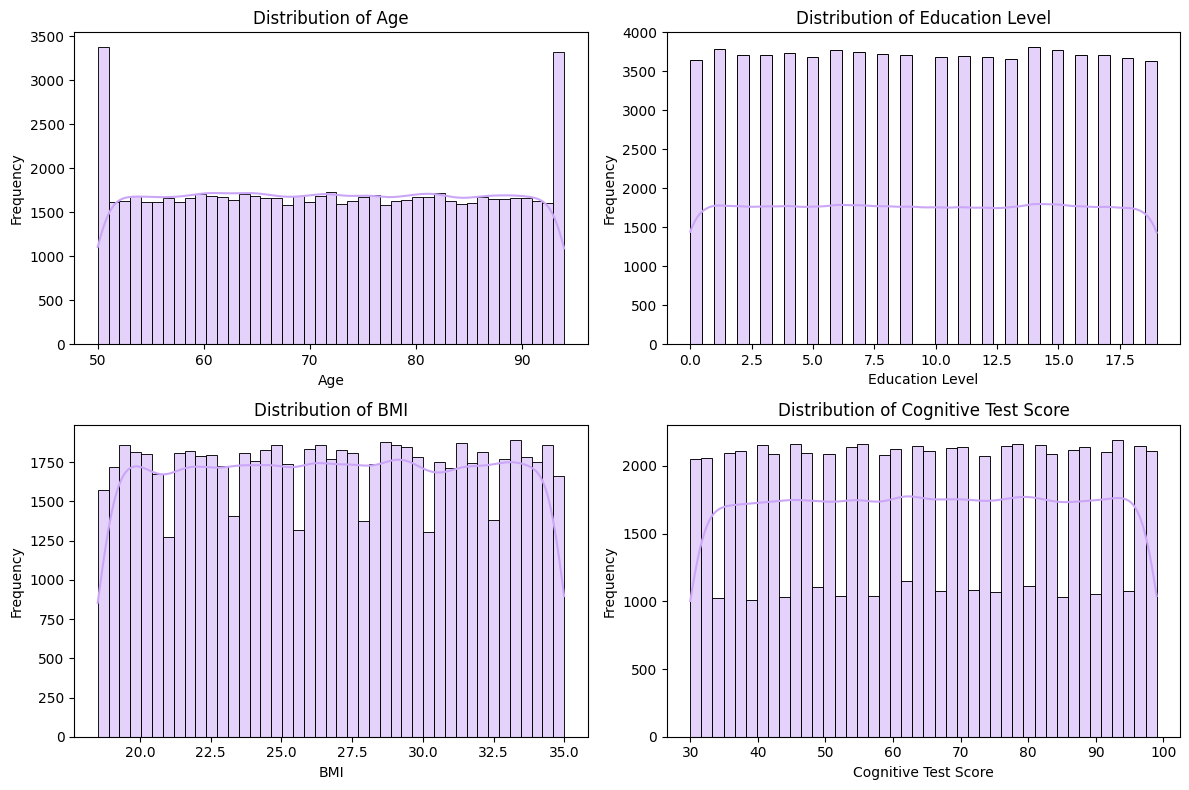

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, color='#cba6f7', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

Exploring the relationships between Categorical features and the target variable




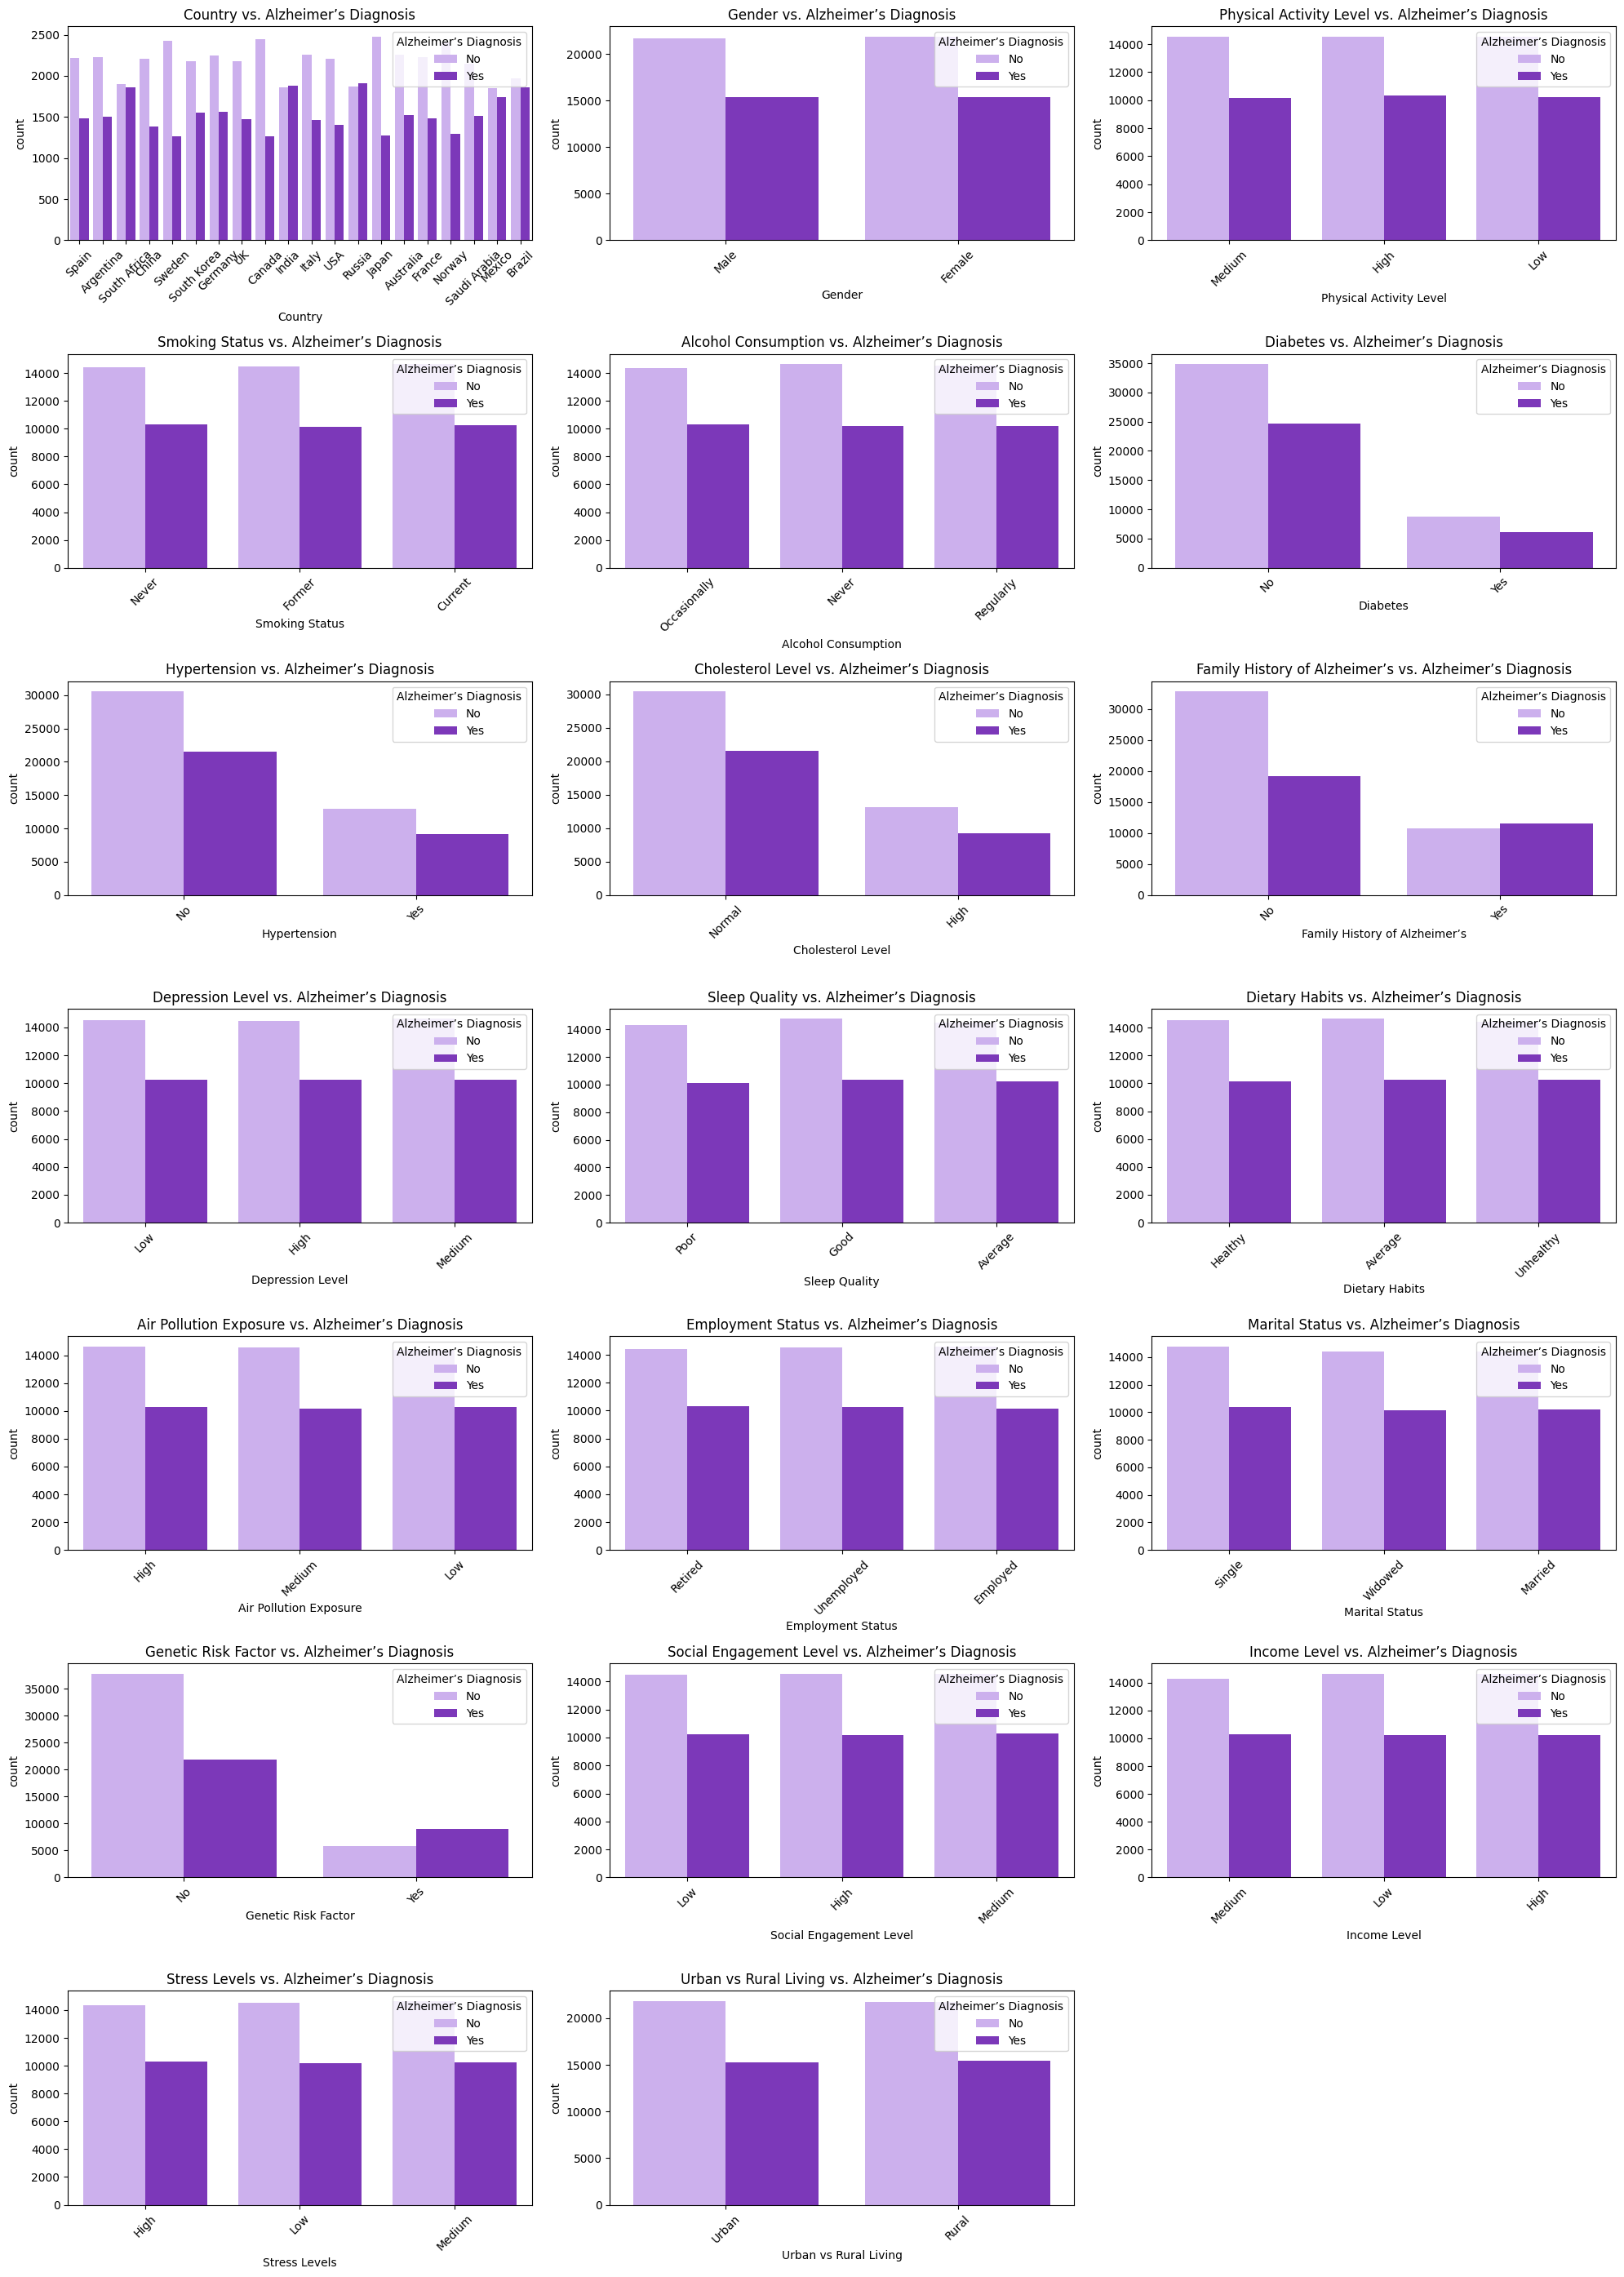

In [13]:
purple_palette = ['#cba6f7', '#7e22ce']

target_col = 'Alzheimer’s Diagnosis'
other_cat_cols = [col for col in categorical_cols if col != target_col]

fig, axes = plt.subplots(7, 3, figsize=(20, 28))
axes = axes.ravel()

for i, col in enumerate(other_cat_cols):
    sns.countplot(x=col, hue=target_col, data=df, ax=axes[i], palette=purple_palette)
    axes[i].set_title(f"{col} vs. {target_col}")
    axes[i].tick_params(axis='x', rotation=45)

# Hiding any remaining empty subplots
for j in range(len(other_cat_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Exploring the relationships between Numerical features and the target variable

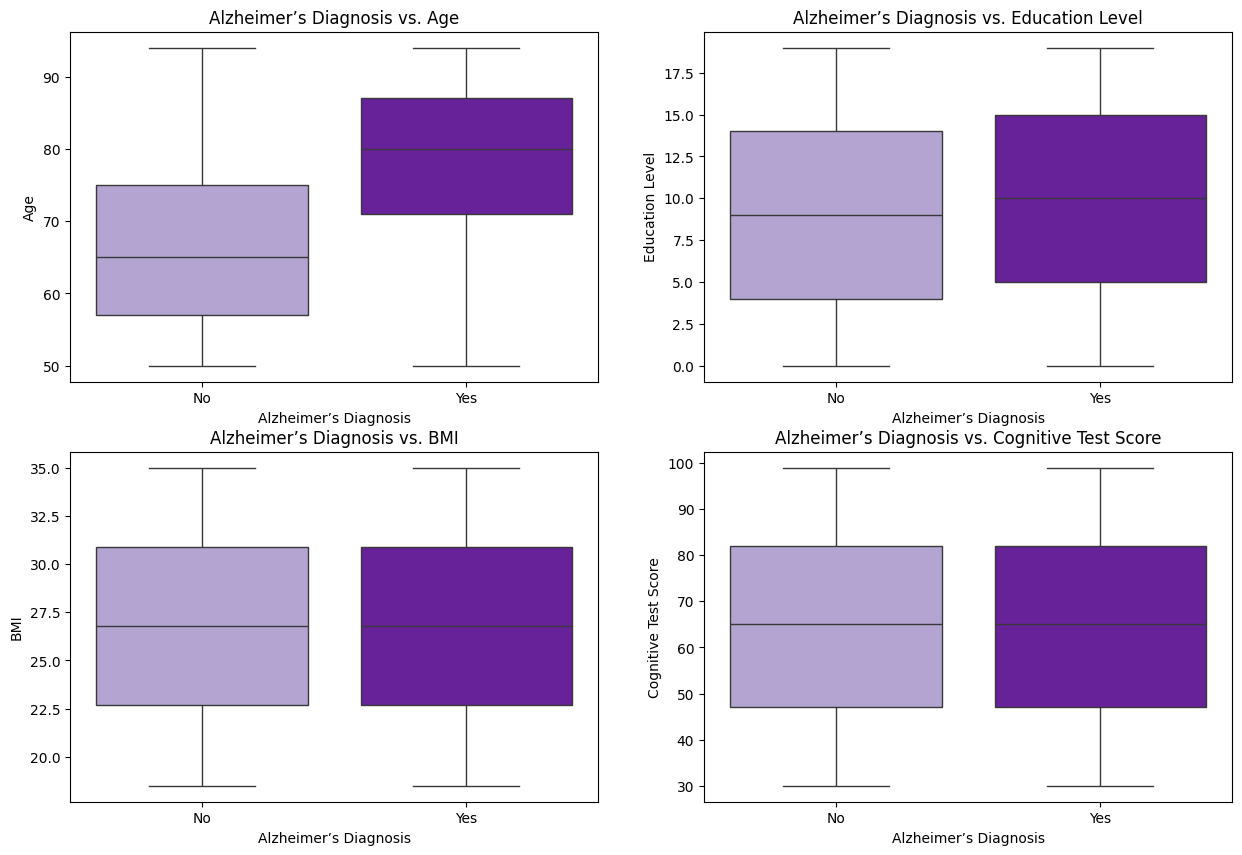

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
purple_palette = ["#b19cd9", "#6a0dad"]

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=target_col, y=col, data=df, palette=purple_palette, ax=axes[i])
    axes[i].set_title(f"{target_col} vs. {col}")

Geographical Representation of spread of the data

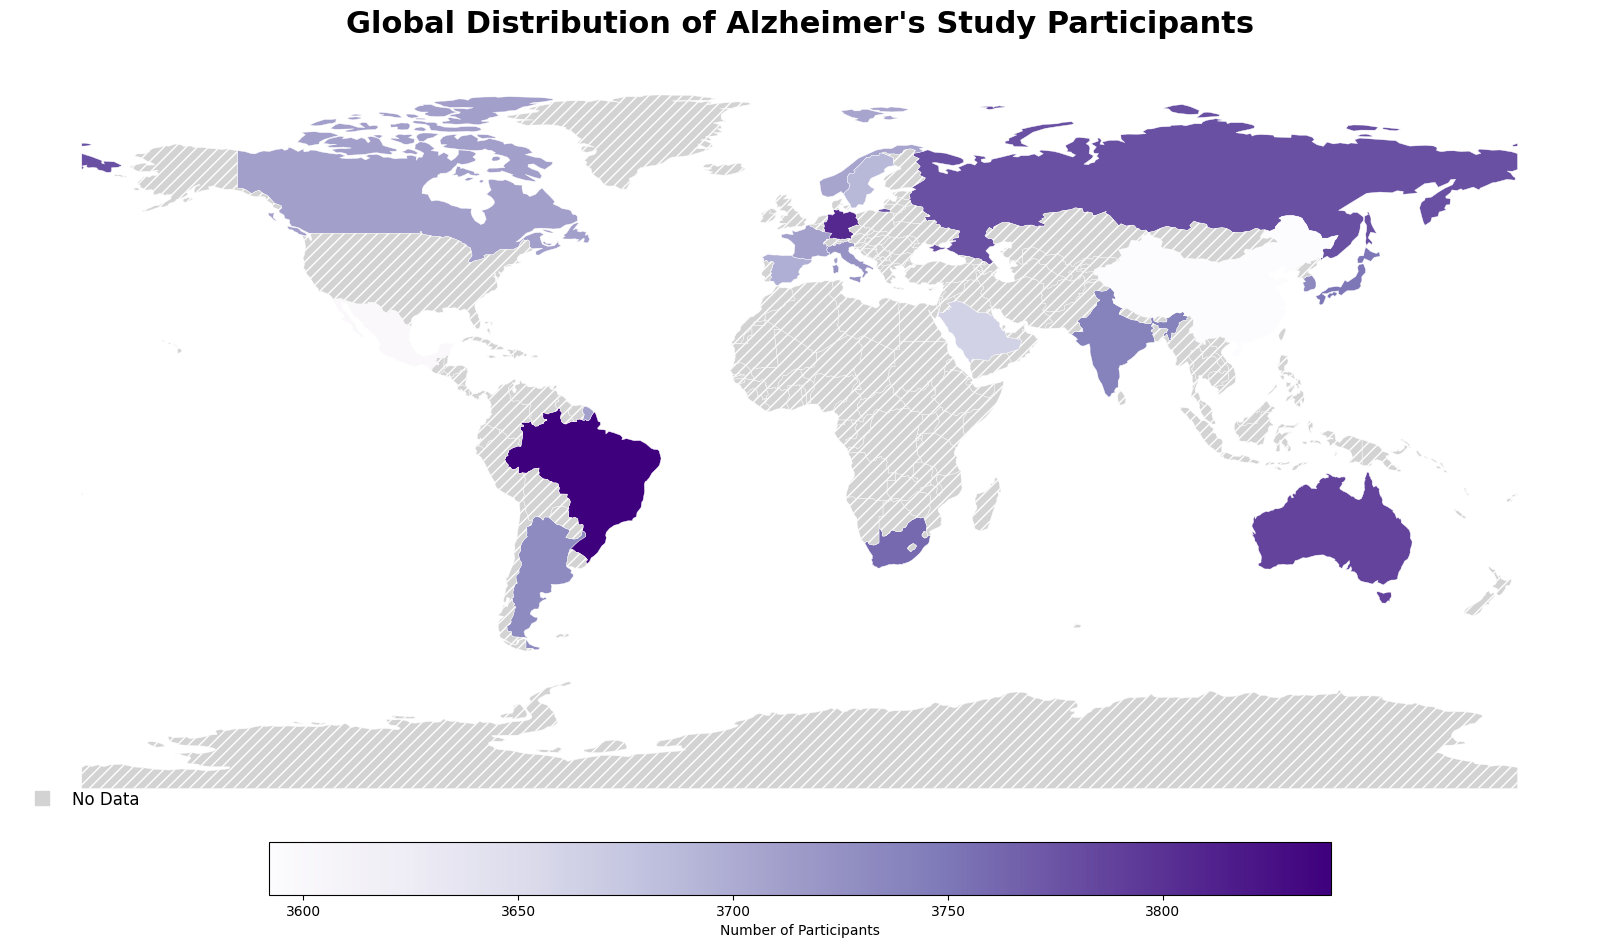

In [15]:
url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
world = gpd.read_file(url)

df_country_count = df['Country'].value_counts().reset_index()
df_country_count.columns = ['Country', 'Count']

world = world.merge(df_country_count, how='left', left_on='NAME', right_on='Country')

fig, ax = plt.subplots(figsize=(18, 10))

world.plot(
    column='Count',
    cmap='Purples',
    linewidth=0.3,
    ax=ax,
    edgecolor='white',
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "white",
        "hatch": "///",
        "label": "No Data"
    },
    legend=True,
    legend_kwds={
        'label': "Number of Participants",
        'orientation': "horizontal",
        'shrink': 0.6,
        'pad': 0.02
    }
)

ax.set_title('Global Distribution of Alzheimer\'s Study Participants',
             fontdict={'fontsize': 22, 'fontweight': 'bold'},
             pad=20)
ax.axis('off')

missing_patch = plt.Line2D([0], [0], linestyle="none", color="lightgrey", marker='s', markersize=10, label='No Data')
plt.legend(handles=[missing_patch], loc='lower left', fontsize=12, frameon=False)

plt.tight_layout()
plt.show()


## Mapping counteries by Continent

In [16]:
df_continent = df.copy()
continent_map = {
    "Argentina": "South America",
    "Australia": "Oceania",
    "Brazil": "South America",
    "Canada": "North America",
    "China": "Asia",
    "France": "Europe",
    "Germany": "Europe",
    "India": "Asia",
    "Italy": "Europe",
    "Japan": "Asia",
    "Mexico": "North America",
    "Norway": "Europe",
    "Russia": "Asia",
    "Saudi Arabia": "Asia",
    "South Africa": "Africa",
    "South Korea": "Asia",
    "Spain": "Europe",
    "Sweden": "Europe",
    "UK": "Europe",
    "USA": "North America"
}

df_continent["Continent"] = df_continent["Country"].map(continent_map)

print(df_continent.head())

        Country  Age  Gender  Education Level   BMI Physical Activity Level  \
0         Spain   90    Male                1  33.0                  Medium   
1     Argentina   72    Male                7  29.9                  Medium   
2  South Africa   86  Female               19  22.9                    High   
3         China   53    Male               17  31.2                     Low   
4        Sweden   58  Female                3  30.0                    High   

  Smoking Status Alcohol Consumption Diabetes Hypertension  ...  \
0          Never        Occasionally       No           No  ...   
1         Former               Never       No           No  ...   
2        Current        Occasionally       No          Yes  ...   
3          Never           Regularly      Yes           No  ...   
4         Former               Never      Yes           No  ...   

  Air Pollution Exposure Employment Status  Marital Status  \
0                   High           Retired          Single  

In [17]:
df_continent = df_continent.drop("Country", axis=1)

In [18]:
average_ages = df_continent.groupby('Continent')['Age'].mean().to_dict()
average_ages

{'Africa': 72.32047872340425,
 'Asia': 71.93300682961898,
 'Europe': 71.91656725033673,
 'North America': 72.03981693363845,
 'Oceania': 71.78294164246105,
 'South America': 72.02892998678996}

Distribution of Data across continents

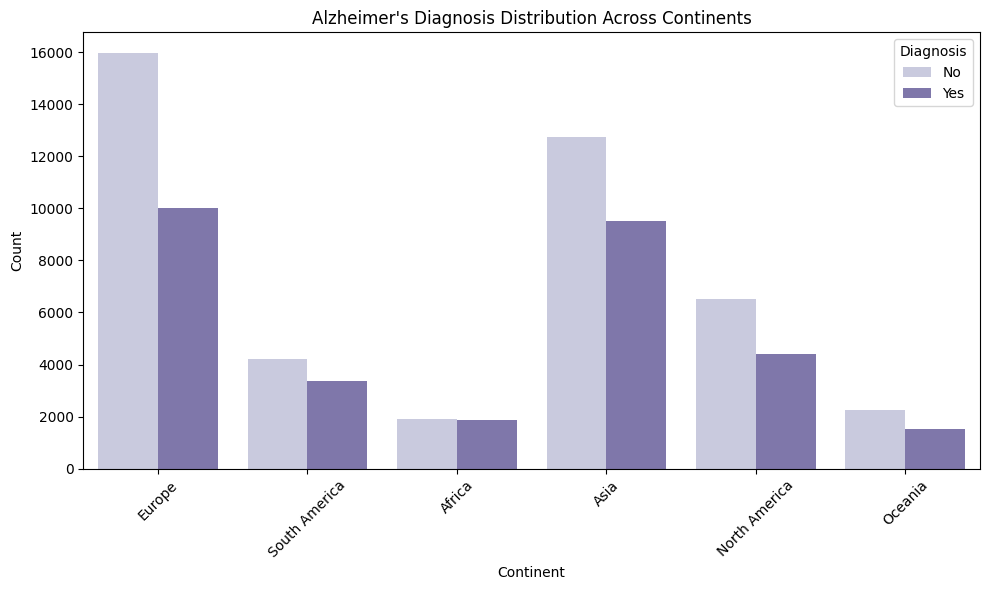

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_continent, x='Continent', hue=target_col, palette='Purples')
plt.title("Alzheimer's Diagnosis Distribution Across Continents")
plt.xlabel("Continent")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Diagnosis")
plt.tight_layout()
plt.show()

In [20]:
for col in ['Continent','Gender', 'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption', 'Diabetes', 'Hypertension', 'Cholesterol Level',
            'Family History of Alzheimer’s', 'Depression Level', 'Sleep Quality','Genetic Risk Factor',
            'Dietary Habits', 'Air Pollution Exposure', 'Employment Status', 'Marital Status',
            'Social Engagement Level', 'Income Level', 'Stress Levels', 'Urban vs Rural Living']:
    df_continent[col] = pd.Categorical(df_continent[col])

In [21]:
df_continent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Age                            74283 non-null  int64   
 1   Gender                         74283 non-null  category
 2   Education Level                74283 non-null  int64   
 3   BMI                            74283 non-null  float64 
 4   Physical Activity Level        74283 non-null  category
 5   Smoking Status                 74283 non-null  category
 6   Alcohol Consumption            74283 non-null  category
 7   Diabetes                       74283 non-null  category
 8   Hypertension                   74283 non-null  category
 9   Cholesterol Level              74283 non-null  category
 10  Family History of Alzheimer’s  74283 non-null  category
 11  Cognitive Test Score           74283 non-null  int64   
 12  Depression Level               7

## Preparing Data for creating continent based model

In [22]:

categorical_cols = df_continent.select_dtypes(include=['category']).columns.tolist()
numeric_cols = df_continent.select_dtypes(include=['number']).columns.tolist()

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(df_continent[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# encode target variable
label_encoder = LabelEncoder()
df_continent['Alzheimer’s Diagnosis'] = label_encoder.fit_transform(df_continent['Alzheimer’s Diagnosis'])

# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_continent[numeric_cols])
scaled_df = pd.DataFrame(scaled_features, columns=numeric_cols)

# Concatenate encoded and scaled features with the target variable
prepared_df_continent = pd.concat([encoded_df, scaled_df, df_continent['Alzheimer’s Diagnosis']], axis=1)

prepared_df_continent.head()

,Gender_Female,Gender_Male,Physical Activity Level_High,Physical Activity Level_Low,Physical Activity Level_Medium,Smoking Status_Current,Smoking Status_Former,Smoking Status_Never,Alcohol Consumption_Never,Alcohol Consumption_Occasionally,...,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Age,Education Level,BMI,Cognitive Test Score,Alzheimer’s Diagnosis
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.389398,-1.474299,1.305314,1.257660,0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.002719,-0.432087,0.654689,0.017157,0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.081247,1.652339,-0.814465,-1.074486,0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,-1.460997,1.304935,0.927532,0.811079,0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-1.075808,-1.126895,0.675677,-0.776765,0


In [23]:
prepared_df_continent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 61 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender_Female                      74283 non-null  float64
 1   Gender_Male                        74283 non-null  float64
 2   Physical Activity Level_High       74283 non-null  float64
 3   Physical Activity Level_Low        74283 non-null  float64
 4   Physical Activity Level_Medium     74283 non-null  float64
 5   Smoking Status_Current             74283 non-null  float64
 6   Smoking Status_Former              74283 non-null  float64
 7   Smoking Status_Never               74283 non-null  float64
 8   Alcohol Consumption_Never          74283 non-null  float64
 9   Alcohol Consumption_Occasionally   74283 non-null  float64
 10  Alcohol Consumption_Regularly      74283 non-null  float64
 11  Diabetes_No                        74283 non-null  flo

## Continent Specific Model

Dividing datasets based on continents to create their own mini models

In [24]:
continent_cols = ['Continent_Africa', 'Continent_Asia', 'Continent_Europe',
                  'Continent_North America', 'Continent_Oceania', 'Continent_South America']

region_datasets = {}

for continent in continent_cols:
    region_name = continent.replace('Continent_', '')
    region_df = prepared_df_continent[prepared_df_continent[continent] == 1].copy()
    region_datasets[region_name] = region_df

Training and evaluating individual continent mini models

In [25]:

region_models = {}
region_performance = {}
region_test_sets = {}

# Loop through each continent in our region datasets
for region_name, region_df in region_datasets.items():

    Xc = region_df.drop(columns=['Alzheimer’s Diagnosis'])
    yc = region_df['Alzheimer’s Diagnosis']
    Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)
    model = RandomForestClassifier(random_state=42)
    model.fit(Xc_train, yc_train)
    region_models[region_name] = model
    region_test_sets[region_name] = (Xc_test, yc_test)

    yc_pred = model.predict(Xc_test)
    performance = classification_report(yc_test, yc_pred, output_dict=True)

    region_performance[region_name] = classification_report(yc_test, yc_pred, output_dict=True)
    print(f"Model trained for {region_name}")


Model trained for Africa
Model trained for Asia
Model trained for Europe
Model trained for North America
Model trained for Oceania
Model trained for South America


Classification report of each mini model

In [26]:
for region in region_performance:
    print(f"Performance for {region}:")

    model = region_models[region]
    Xc_test, yc_test = region_test_sets[region]

    print(classification_report(yc_test, model.predict(Xc_test)))
    print("\n")


Performance for Africa:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       370
           1       0.74      0.75      0.74       382

    accuracy                           0.74       752
   macro avg       0.74      0.74      0.74       752
weighted avg       0.74      0.74      0.74       752



Performance for Asia:
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      2568
           1       0.65      0.59      0.62      1884

    accuracy                           0.69      4452
   macro avg       0.69      0.68      0.68      4452
weighted avg       0.69      0.69      0.69      4452



Performance for Europe:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78      3195
           1       0.67      0.54      0.60      2002

    accuracy                           0.72      5197
   macro avg       0.70      0.69      0.69      5197


In [27]:
for region, df in region_datasets.items():
    original_df = df_continent.loc[df.index]
    avg_age = original_df['Age'].mean()
    average_ages[region] = avg_age

f1_scores = {}

for region, performance in region_performance.items():
    f1 = performance['weighted avg']['f1-score']
    f1_scores[region] = f1

In [28]:
comparison_df = pd.DataFrame({
    'Average Age': average_ages,
    'F1 Score': f1_scores
}).sort_values(by='Average Age')

print(comparison_df)

               Average Age  F1 Score
Oceania          71.782942  0.670988
Europe           71.916567  0.712583
Asia             71.933007  0.691229
South America    72.028930  0.703035
North America    72.039817  0.713396
Africa           72.320479  0.737970


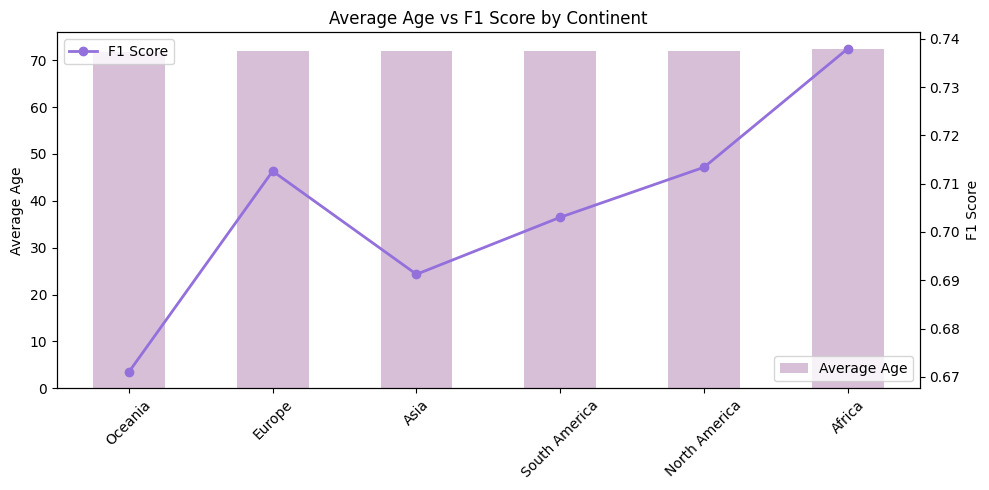

In [29]:

bar_color = '#d8bfd8'
line_color = '#9370DB'

ax = comparison_df.plot(kind='bar', y='Average Age', color=bar_color, rot=45, figsize=(10, 5))
ax.set_ylabel("Average Age")
ax.set_title("Average Age vs F1 Score by Continent")
ax.legend(loc='lower right')

ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), comparison_df['F1 Score'], color=line_color, marker='o', linewidth=2, label='F1 Score')
ax2.set_ylabel("F1 Score")

ax2.legend(loc='best')

plt.tight_layout()
plt.show()

# Modeling for the entire dataset with important features and as a whole

In [30]:
# Spliting data into training and temporary sets
X = prepared_df_continent.drop('Alzheimer’s Diagnosis', axis=1)
y = prepared_df_continent['Alzheimer’s Diagnosis']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Spliting temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [31]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

Feature Importance

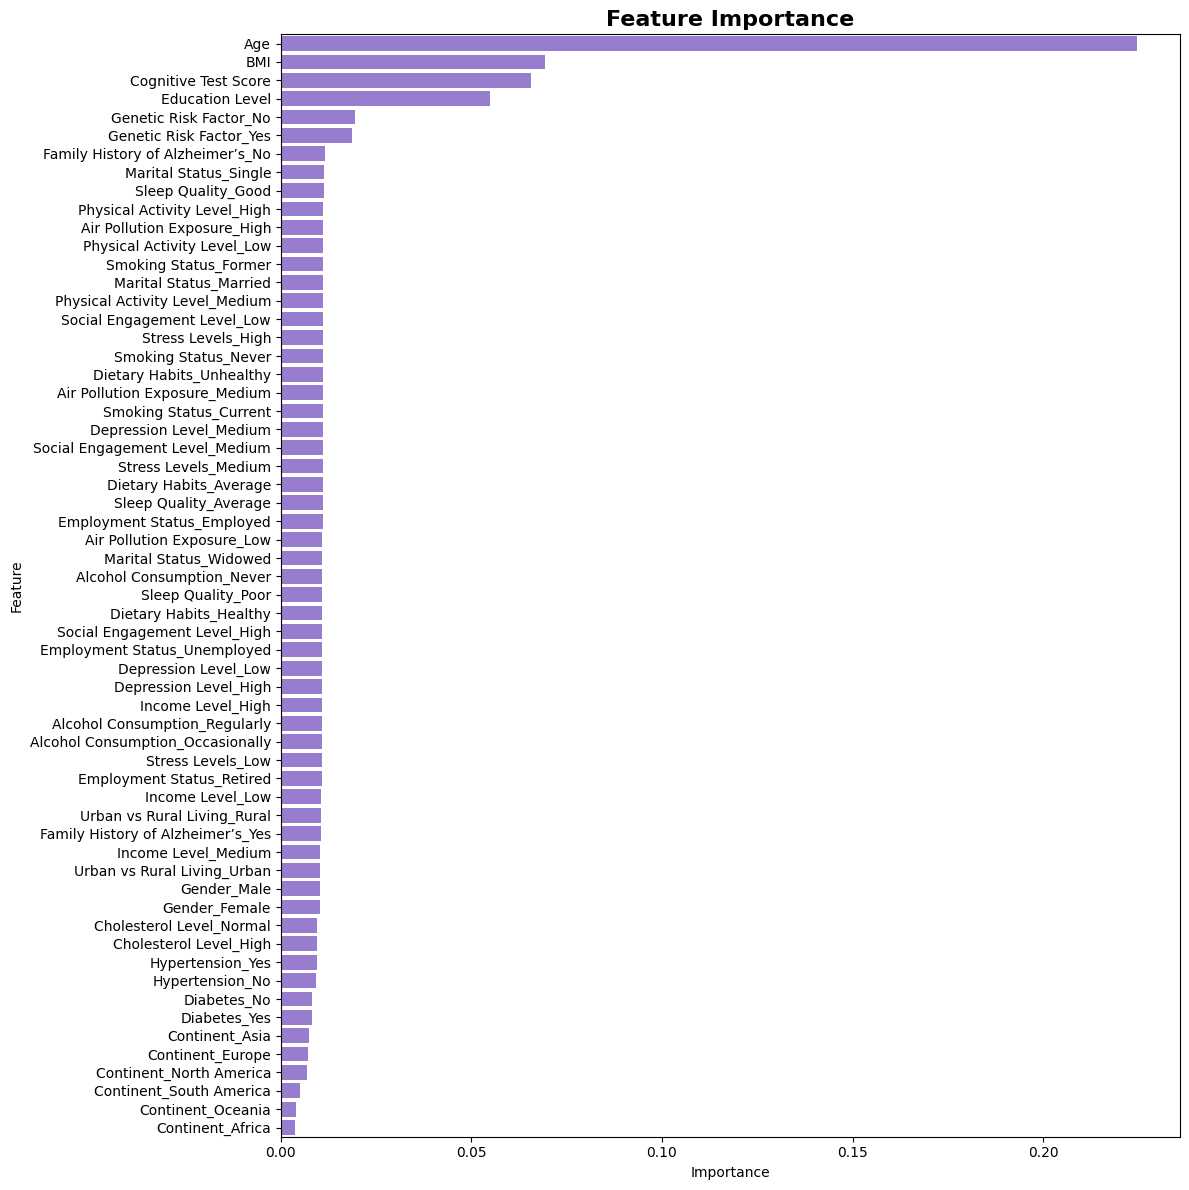

In [32]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 12))
sns.barplot(x=feature_importance.importance, y=feature_importance.feature, color='#9370DB')
plt.title("Feature Importance", fontsize=16, fontweight='bold')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

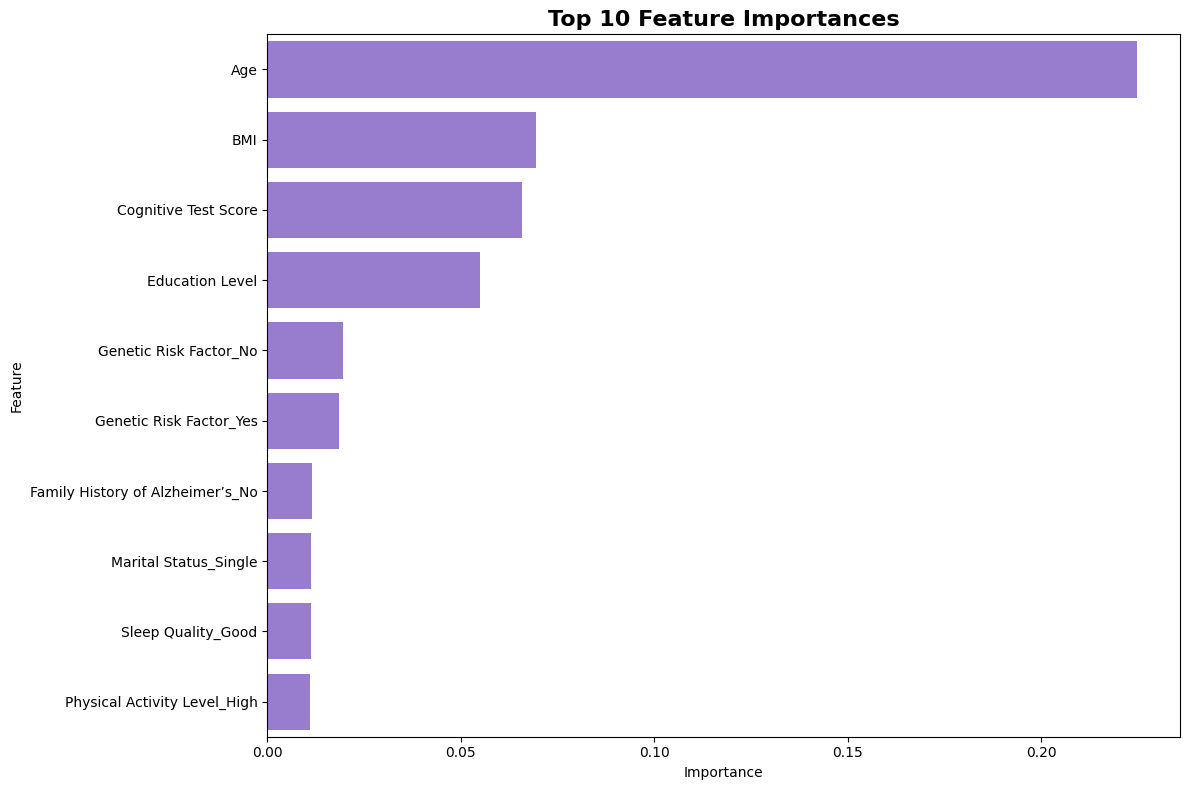

In [33]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

top_10_features = feature_importance.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_features.importance, y=top_10_features.feature, color='#9370DB')
plt.title("Top 10 Feature Importances", fontsize=16, fontweight='bold')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## Modeling based on top 6 features

In [34]:
columns_to_keep = ["Age", "BMI", "Cognitive Test Score", "Education Level","Genetic Risk Factor_No",
                   "Genetic Risk Factor_Yes","Alzheimer’s Diagnosis"]
df_fi = prepared_df_continent[columns_to_keep]

In [35]:
Xfi = df_fi.drop('Alzheimer’s Diagnosis', axis=1)
yfi = df_fi['Alzheimer’s Diagnosis']
Xfi_train, Xfi_test, yfi_train, yfi_test = train_test_split(Xfi, yfi, test_size=0.2, random_state=42, stratify=y)

In [36]:
gb = GradientBoostingClassifier()
gb.fit(Xfi_train, yfi_train)

GradientBoostingClassifier()

In [37]:
yfi_pred = gb.predict(Xfi_test)
accuracy = accuracy_score(yfi_test, yfi_pred)
precision = precision_score(yfi_test, yfi_pred)
recall = recall_score(yfi_test, yfi_pred)
f1 = f1_score(yfi_test, yfi_pred)

print(f"Evaluation Metrics for Gradient Boosting model on the top features set:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-score: {f1:.4f}")
print(classification_report(yfi_test, yfi_pred))

Evaluation Metrics for Gradient Boosting model on the top features set:
  Accuracy: 0.7295
  Precision: 0.6536
  Recall: 0.7356
  F1-score: 0.6922
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      8714
           1       0.65      0.74      0.69      6143

    accuracy                           0.73     14857
   macro avg       0.72      0.73      0.73     14857
weighted avg       0.74      0.73      0.73     14857



# Training multiple models on entire dataset to find the best performing one



In [38]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

# Train the models
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        print(f"{name} trained successfully.")
    except Exception as e:
        print(f"Error training {name}: {e}")

Logistic Regression trained successfully.
Random Forest trained successfully.
Gradient Boosting trained successfully.
XGBoost trained successfully.


## Evaluating each model

In [39]:

for name, model in models.items():
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    print(f"Evaluation Metrics for {name}:")
    print(f"  Accuracy: {accuracy:.4f}") # Proportion of correct predictions (both positive and negative)
    print(f"  Precision: {precision:.4f}") # Out of all positive predictions (Yes), how many were actually correct
    print(f"  Recall: {recall:.4f}") # Out of all actual positives (Yes), how many were correctly identified, important metric for medical analysis
    print(f"  F1-score: {f1:.4f}") # Harmonic mean of Precision and Recall. Balances both metrics, especially useful when the class distribution is imbalanced
    print(classification_report(y_val, y_pred))

    try:
        y_prob = model.predict_proba(X_val)[:, 1]
        roc_auc = roc_auc_score(y_val, y_prob)
        print(f"  AUC-ROC: {roc_auc:.4f}")
    except AttributeError:
        print("  AUC-ROC: Not available for this model.")
    print("-" * 30)

Evaluation Metrics for Logistic Regression:
  Accuracy: 0.7080
  Precision: 0.6640
  Recall: 0.5946
  F1-score: 0.6274
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      4357
           1       0.66      0.59      0.63      3071

    accuracy                           0.71      7428
   macro avg       0.70      0.69      0.69      7428
weighted avg       0.70      0.71      0.71      7428

  AUC-ROC: 0.7845
------------------------------
Evaluation Metrics for Random Forest:
  Accuracy: 0.7127
  Precision: 0.6703
  Recall: 0.6005
  F1-score: 0.6335
              precision    recall  f1-score   support

           0       0.74      0.79      0.76      4357
           1       0.67      0.60      0.63      3071

    accuracy                           0.71      7428
   macro avg       0.70      0.70      0.70      7428
weighted avg       0.71      0.71      0.71      7428

  AUC-ROC: 0.7881
------------------------------
Evaluation Metri

Plotting the AUC-ROC curves for each model

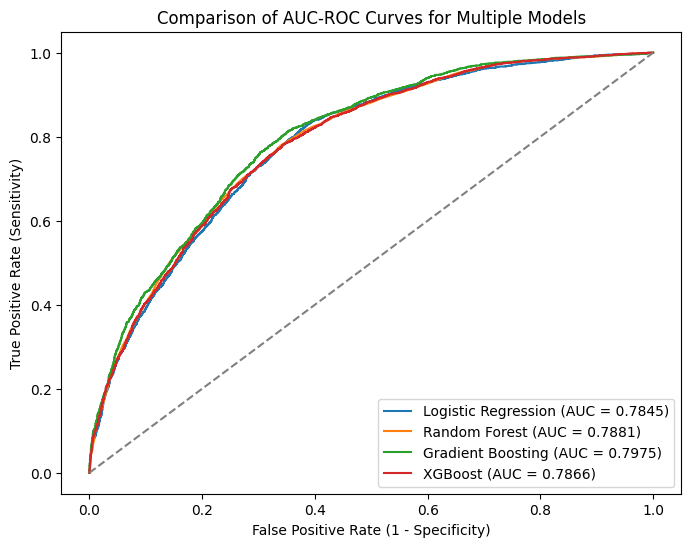

In [40]:
plt.figure(figsize=(8, 6))

for name, model in models.items():
    try:
        y_pred = model.predict_proba(X_val)[:, 1]
        fpr, tpr, _ = roc_curve(y_val, y_pred)
        roc_auc = roc_auc_score(y_val, y_pred)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')
    except AttributeError:
        print(f"{name} does not support AUC-ROC.")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Comparison of AUC-ROC Curves for Multiple Models')
plt.legend(loc='lower right')
plt.show()


## Choosing to move ahead with Gradient Boosting for Hyperparameter Tuning
It was selected because it achieved the highest recall and AUC-ROC scores. In medical diagnosis, recall is prioritized over accuracy to reduce the risk of false negatives.


In [41]:
# Tuning
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'subsample': uniform(0.6, 0.4)
}

random_search = RandomizedSearchCV(
    GradientBoostingClassifier(),
    param_distributions=param_dist,
    n_iter=50,
    scoring='roc_auc',
    n_jobs=-1,
    cv=5,
    verbose=1,
    random_state=42
)

random_search.fit(X_val, y_val)

print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Storing the best estimator
best_gb_model = random_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters: {'learning_rate': np.float64(0.019915219870164515), 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 102, 'subsample': np.float64(0.7957811041110252)}
Best score: 0.7967949576772214


In [42]:
y_pred = best_gb_model.predict(X_test)

In [43]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Evaluation Metrics for the tuned Gradient Boosting model:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-score: {f1:.4f}")
print(classification_report(y_test, y_pred))

y_prob = best_gb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"  AUC-ROC: {roc_auc:.4f}")

Evaluation Metrics for the tuned Gradient Boosting model:
  Accuracy: 0.7312
  Precision: 0.6649
  Recall: 0.7054
  F1-score: 0.6846
              precision    recall  f1-score   support

           0       0.78      0.75      0.77      4357
           1       0.66      0.71      0.68      3072

    accuracy                           0.73      7429
   macro avg       0.72      0.73      0.73      7429
weighted avg       0.73      0.73      0.73      7429

  AUC-ROC: 0.8047


# New Input Prediction using code block

In [ ]:
def predict_diagnosis(new_input, encoder, scaler, best_gb_model, label_encoder, categorical_cols, numeric_cols):
    """
    Predicts the diagnosis for a new input using the trained model and preprocessing objects.

    Parameters:
        new_input (dict): Input data as a dictionary with feature names as keys.
        encoder (OneHotEncoder): Fitted encoder for categorical features.
        scaler (StandardScaler): Fitted scaler for numeric features.
        best_gb_model: Trained & Tuned Gradient Boosting model.
        label_encoder (LabelEncoder): Fitted label encoder for target.
        categorical_cols (list): List of categorical column names.
        numeric_cols (list): List of numeric column names.

    Returns:
        predicted_label: The predicted label ('Yes' or 'No').
        probability: The predicted probability for each class.
    """
    import pandas as pd
    # Convert input to DataFrame
    new_input_df = pd.DataFrame([new_input])

    # Encode categorical features
    encoded_new = encoder.transform(new_input_df[categorical_cols])
    encoded_new_df = pd.DataFrame(encoded_new, columns=encoder.get_feature_names_out(categorical_cols))

    # Scale numeric features
    scaled_new = scaler.transform(new_input_df[numeric_cols])
    scaled_new_df = pd.DataFrame(scaled_new, columns=numeric_cols)

    # Concatenate features
    X_new = pd.concat([encoded_new_df, scaled_new_df], axis=1)

    # Predict
    prediction = best_gb_model.predict(X_new)
    probability = best_gb_model.predict_proba(X_new)

    # Decode prediction
    predicted_label = label_encoder.inverse_transform(prediction)
    return predicted_label[0], probability[0]


In [ ]:
# Example input
new_input = {
    "Age": 72,
    "Gender": "Male",
    "Education Level": 19,
    "BMI": 25,
    "Physical Activity Level": "Low",
    "Smoking Status": "Current",
    "Alcohol Consumption": "Regularly",
    "Diabetes": "Yes",
    "Hypertension": "Yes",
    "Cholesterol Level": "High",
    "Family History of Alzheimer’s": "No",
    "Cognitive Test Score": 65,
    "Depression Level": "High",
    "Sleep Quality": "Poor",
    "Dietary Habits": "Unhealthy",
    "Air Pollution Exposure": "High",
    "Employment Status": "Unemployed",
    "Marital Status": "Married",
    "Genetic Risk Factor": "No",
    "Social Engagement Level": "Low",
    "Income Level": "Low",
    "Stress Levels": "High",
    "Urban vs Rural Living": "Rural",
    "Continent": "Asia"
}

result, prob = predict_diagnosis(
    new_input,
    encoder,
    scaler,
    best_gb_model,
    label_encoder,
    categorical_cols,
    numeric_cols
)
print(f"Predicted Diagnosis: {result}")
print(f"Class Probabilities: {prob}")



#New Input Prediction using Streamlit

In [ ]:
import pickle

with open('gb_model.pkl', 'wb') as file:
    pickle.dump(best_gb_model, file)

with open('encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

App URL : https://alzheimerdiagnosis.streamlit.app/